<a href="https://colab.research.google.com/github/henrygas/tensorflow_2_learn/blob/master/pca_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA


In [2]:
# 载入数据
digits_data = datasets.load_digits()
n = len(digits_data.images)
print("len(digits_data):{}".format(n))

len(digits_data):1797


In [3]:
# 每张图像被表示为一个8*8数组。将数组扁平化，作为PCA的输入
image_data = digits_data.images.reshape((n, -1))
print("image_data.shape:{}".format(image_data.shape))

image_data.shape:(1797, 64)


In [4]:
# 数字的真实值标签在每张图片中
labels = digits_data.target
print("labels:{}".format(labels))

labels:[0 1 2 ... 8 9 8]


In [5]:
# 为这个数据集拟合一个PCA转换器
# 自动选择主成分的数目，使主成分能解释至少80%原来的方差
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
print(pca_transformer.explained_variance_ratio_)

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863]


In [6]:
print(pca_transformer.explained_variance_ratio_[:3].sum())

0.4030395858767507


Text(0.5, 0, 'Principal component 3')

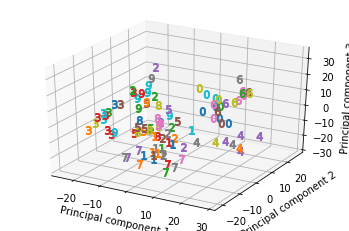

In [8]:
# 结果可视化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i in range(100):
  ax.scatter(pca_images[i, 0], pca_images[i, 1], pca_images[i, 2], marker=r"${}$".format(labels[i]), s=64)
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
ax.set_zlabel("Principal component 3")
#plt.show()